# Data Science for Construction, Architecture and Engineering
### Section 5 - Introduction to Machine Learning
## Exercise Set 5.1 - Introduction to ML - Clustering

This exercise is related to the first half of Section 5 videos. Using the same data (Project Building Data Genome) and packages (sklearn, matplotlib) as in the videos. The following tasks are about supervised and unsupervised learning algorithms. 


There is an introduction video available to explain the process of doing the next exercises.

The developer of this exercise is [Mahmoud Abdelrahman](https://www.linkedin.com/in/mahmoudouf/), a Ph.D. student at NUS.




#### Setup the environment

Let's set up the environment:

In [1]:
# Import packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm

import sklearn
from sklearn import metrics

from scipy.cluster.vq import kmeans, vq, whiten
from scipy.spatial.distance import cdist
import numpy as np
from datetime import datetime
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/gdrive')
# Change directory location (hint: chdir)
os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/3 - Construction - Pandas Fundamentals/meter_data/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Exercise 05.1.1 - Plot the average day-of-the-week consumption

In this exercise, we need to plot the average day-of-the-week energy consumption from `UnivDorm_Ashleigh.csv` file. 

*   The X axis should be the day of the week. 
*   the Y axis is the average daily consumption over the year. 

An example of the output should look like this: 

<center>
<img width="486" alt="visualization" src="https://user-images.githubusercontent.com/6969514/85218845-c81af200-b3d0-11ea-96fd-6bf970bcf811.png">
</center>


**Hints**
1. Use the [DatetimeIndex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) property [`dayofweek`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html) to get the day of the week from the timestamp. 
2. Group the dataframe by the `dayofweek` column that you create.

<!-- ### **Q1: What is the day of the week that has the highest average energy consumption throughout the year in `UnivDorm_Ashleigh`?**  -->

Find the day of the week where `UnivDorm_Ashleigh` has the highest **average** energy consumption


In [3]:
# Find the day of the week with the maximum average energy consumption
# YOUR CODE HERE
df = pd.read_csv('UnivDorm_Ashleigh.csv', index_col='timestamp', parse_dates=True)
df['Day'] = df.index.day_name()

In [4]:
daily_avg = df.groupby('Day').mean()

In [5]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = df.groupby('Day').mean().reindex(days)

<BarContainer object of 7 artists>

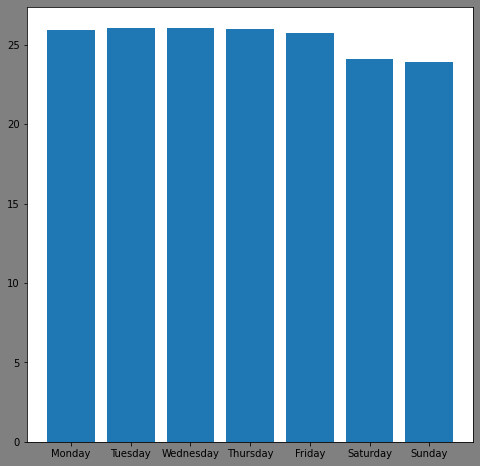

In [6]:
plt.figure(figsize=(8,8), facecolor='grey')
plt.bar(data=daily_avg, x=daily_avg.index, height=daily_avg.UnivDorm_Ashleigh)

In [ ]:
daily_avg.idxmax()

UnivDorm_Ashleigh    Tuesday
dtype: object

## Exercise 05.1.2 - Clustering

<!-- We need to cluster the energy consumption from the file `UnivDorm_Ashleigh.csv` into **weekly load profile** using **two clusters**. The weekly load profile should cosist of 7 values representing the `dayofweek`.  -->

<!-- ### **Q2: According to your results, How many vacation weeks were taken during this academic year?** -->

Let's say we want to find two types of weekly consumption behaviour from the `UnivDorm_Ashleigh.csv` building. The first thing to do would be to create weekly load profiles.

Each weekly profile consists of 7 values, one for each day of the week, of energy consumption. Thus, every week in the year worth of data from the building, is treated as **one** datapoint with 7 features.

Since we already have a specific number of clusters in mind, we can use `k-means` to find which week correspond to each cluster.

Remember that we have chosen the number of clusters arbitrarily, and given the datapoints (weekly profiles), `k-means` will find the ones that are close to each other assuming there are only 2 groups (see a more detailed explanation [here](https://mahmoudouf.wordpress.com/2019/05/12/k-means-clustering-simply/))

Firstly, identify a cluster of weekly profiles with the lowest values of energy consumption. From there, find the **number of weeks** in the cluster.

**Hint**: Plotting the weeks of each cluster, color coded, is a good way to see which cluster is made of the low-consuming weeks. 

**Hint**: For a more fair comparison, is good to start first by normalizing the consumption values. One way to do this is by applying **min-max normalization**. The formula is as follows:

$x_{new} = \frac{x_{original} - x_{min}}{x_{max} - x_{min}}$


In [7]:
# Reload the data file and create a normalized dataframe
# YOUR CODE HERE 
df2 = pd.read_csv('UnivDorm_Ashleigh.csv', index_col='timestamp', parse_dates=True)
df2 = (df2 - df2.min())/(df2.max() - df2.min())
df2.head()


,UnivDorm_Ashleigh
timestamp,
2015-01-01 00:00:00,0.587747
2015-01-01 01:00:00,0.569879
2015-01-01 02:00:00,0.576260
2015-01-01 03:00:00,0.573070
2015-01-01 04:00:00,0.567326


In [8]:
# Create weekly profiles and day of week to the normalized dataframe. 
# Create a pivoted DataFrame 
# YOUR CODE HERE 

df2['Day_name'] = df2.index.map(lambda t: t.day_name())
df2['Day_no'] = df2.index.map(lambda t: t.weekday())
df2['Week'] = df2.index.map(lambda t: t.week)

In [9]:
df2_pivot = df2.pivot_table(values='UnivDorm_Ashleigh', index='Week', columns=('Day_no'), aggfunc='mean')
df2_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 1 to 53
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       52 non-null     float64
 1   1       52 non-null     float64
 2   2       52 non-null     float64
 3   3       53 non-null     float64
 4   4       52 non-null     float64
 5   5       52 non-null     float64
 6   6       52 non-null     float64
dtypes: float64(7)
memory usage: 3.3 KB


In [10]:
df2_pivot

Day_no,0,1,2,3,4,5,6
Week,,,,,,,
1,NaN,NaN,NaN,0.603010,0.577643,0.522203,0.517097
2,0.637364,0.641619,0.641300,0.643959,0.658211,0.573601,0.546054
3,0.708147,0.731886,0.729891,0.654143,0.701958,0.554855,0.558525
4,0.555733,0.717028,0.725251,0.730656,0.741425,0.592799,0.606121
5,0.698389,0.682833,0.652042,0.658796,0.645793,0.468969,0.471123
6,0.611173,0.649729,0.662306,0.655286,0.592055,0.456977,0.465140
7,0.618166,0.628164,0.646937,0.618485,0.546533,0.416055,0.415789
8,0.570650,0.595219,0.593464,0.603010,0.554988,0.458067,0.393533
9,0.558684,0.589582,0.559695,0.606520,0.525447,0.370905,0.375133


In [11]:
df2_pivot[df2_pivot.isnull().any(axis=1)]

Day_no,0,1,2,3,4,5,6
Week,,,,,,,
1,NaN,NaN,NaN,0.603010,0.577643,0.522203,0.517097
53,0.533211,0.552622,0.556477,0.542225,NaN,NaN,NaN


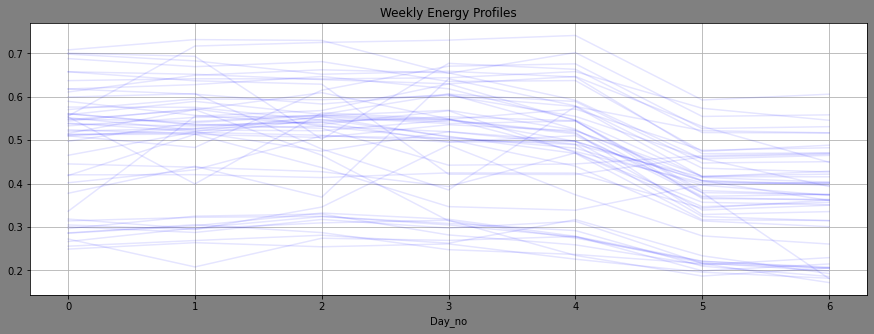

In [19]:
fig, ax = plt.subplots(facecolor='grey')
df2_pivot.T.plot(ax=ax, legend=False, figsize=(15,5), 
                 color='b', alpha=0.1, grid=True, 
                 title='Weekly Energy Profiles')

In [20]:
# Create two clusters out of the normlized dataframe using k-means
# YOUR CODE HERE

df2_pivot_mat = np.matrix(df2_pivot.dropna())
centers, _ = kmeans(df2_pivot_mat, 2, iter=20000)
cluster, _ = vq(df2_pivot_mat, centers)

In [21]:
# Assign the cluster number into a new column called "ClusterNo"
# YOUR CODE HERE 

clusterdf = pd.DataFrame(cluster, columns=["ClusterNo"])

In [22]:
# Plot the clusters with different colors and find the number of weeks with low energy consumption??
# YOUR CODE HERE
df2_pivot = pd.concat([df2_pivot.dropna().reset_index(), clusterdf], axis=1)
df2_pivot.set_index('Week', inplace=True)
df2_pivot.head()

,0,1,2,3,4,5,6,ClusterNo
Week,,,,,,,,
2,0.637364,0.641619,0.641300,0.643959,0.658211,0.573601,0.546054,1
3,0.708147,0.731886,0.729891,0.654143,0.701958,0.554855,0.558525,1
4,0.555733,0.717028,0.725251,0.730656,0.741425,0.592799,0.606121,1
5,0.698389,0.682833,0.652042,0.658796,0.645793,0.468969,0.471123,1
6,0.611173,0.649729,0.662306,0.655286,0.592055,0.456977,0.465140,1


In [24]:
df2_clustered = df2_pivot.groupby(['ClusterNo', 'Week']).mean()
df2_T = df2_clustered.T
df2_T.head()

ClusterNo         0                      ...         1                    
Week             23        24        25  ...        50        51        52
0          0.515927  0.266699  0.314242  ...  0.618113  0.576500  0.560891
1          0.570464  0.297782  0.322458  ...  0.606015  0.575915  0.536934
2          0.465380  0.324293  0.324718  ...  0.583493  0.546027  0.527494
3          0.314348  0.308365  0.304882  ...  0.606148  0.548208  0.442539
4          0.274702  0.291879  0.277388  ...  0.589263  0.571873  0.445411

[5 rows x 51 columns]

Text(0, 0.5, 'Norm Energy Consumption (kWh)')

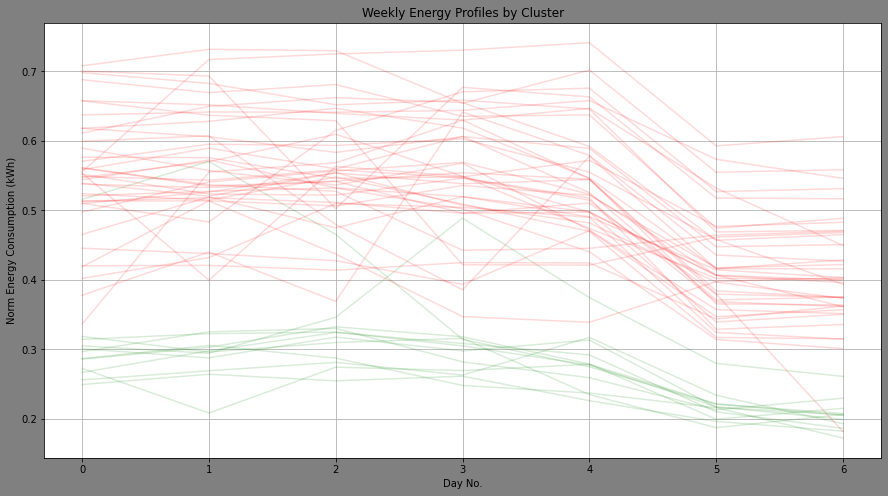

In [67]:
#create lineplots for each week with different cluster colors
clusterlist = list(df2_T.columns.get_level_values(0).unique())
styles = ['g','r']

fig, ax = plt.subplots(facecolor='grey')
for col, style in zip(clusterlist, styles):
    df2_T[col].plot(ax=ax, legend=False, figsize=(15,8), style=style, 
                    alpha=0.15, title='Weekly Energy Profiles by Cluster', grid=True)

plt.xlabel("Day No.")
plt.ylabel("Norm Energy Consumption (kWh)")

In [36]:
#these are the number of weeks belonging to each cluster
df2_T.columns.get_level_values(0).value_counts()

1    39
0    12
Name: ClusterNo, dtype: int64

## Exercise 05.1.3 - Creating a new line-based visualization - Advanced (optional)

Now, for each cluster, calculate the **mean and standard deviation** of the consumption values, and plot the **mean** and the **standard deviation** in a duplicate visualization to the following graphic, except with two clusters instead of four.

<center><img src="https://user-images.githubusercontent.com/6969514/81120853-1890da00-8f60-11ea-9861-4817e4c4587f.png" width="60%" style="align:center"></center>

You will be required to use some code that has not been shown in the videos.

**Hint:** You can `groupby` by cluster number and then get the mean `.mean()` and the standard deviation `.std()` directly.

**Hint:** Use matplotlib to [`fill_between`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.fill_between.html) the upper and the lower limits of the std

In [75]:
# For each cluster calculate the mean and standard deviation to then use `fill_between` in matplotlib
# YOUR CODE HERE
df3 = df2_clustered.groupby('ClusterNo').agg(['mean', 'std']).T

In [86]:
df4 = df3.reset_index()

In [88]:
df4.columns

Index(['level_0', 'level_1', 0, 1], dtype='object', name='ClusterNo')

In [99]:
df4

ClusterNo,level_0,level_1,0,1
0,0,mean,0.305626,0.549923
1,0,std,0.069798,0.088550
2,1,mean,0.311957,0.561851
3,1,std,0.087128,0.081735
4,2,mean,0.320599,0.558584
5,2,std,0.053237,0.080001
6,3,mean,0.305908,0.554760
7,3,std,0.062508,0.088917
8,4,mean,0.280222,0.539547
9,4,std,0.041371,0.085575


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


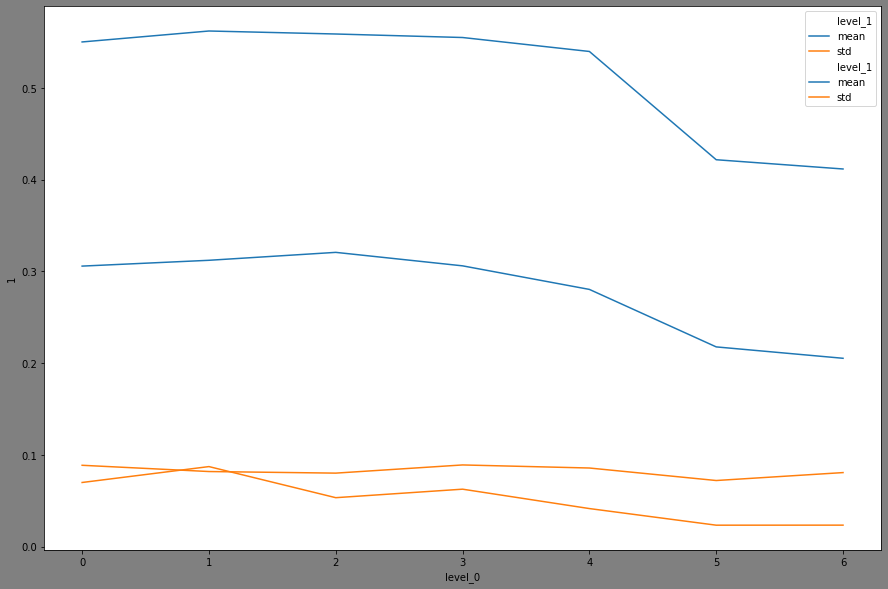

In [102]:
plt.figure(figsize=(15,10), facecolor='grey')

cols_to_plot = df4.columns[[2,3]]

for i in range(len(cols_to_plot)):
    fig.add_subplot(1,2,i+1)
    sns.lineplot(data=df4, x='level_0',y=cols_to_plot[i], hue='level_1')

In [107]:
df2_mean = df2_clustered.groupby('ClusterNo').mean().T
df2_std = df2_clustered.groupby('ClusterNo').std().T

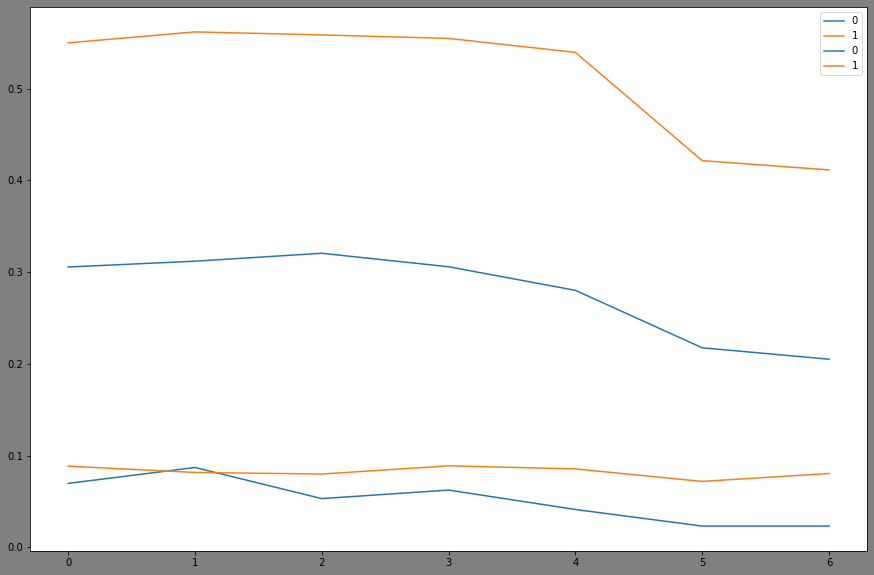

In [119]:
plt.figure(figsize=(15,10), facecolor='grey')
sns.lineplot(data=df2_mean, dashes=False)
sns.lineplot(data=df2_std, dashes=False)